# Завдання №7 по моделям PDE

**Отримати розв'язок PDE системи із дифузійною складовою та як мінімум двома просторовими компонентами x, y. Модель системи узяти відповідно до теми власної дипломної роботи або модифікувати розглянуті на заняттях PDE системи (тема: PDE cкладні моделі). Системи мають бути різними у різних студентів.
Розрахунок моделі зберегти в відео, а також вивести на графік "зрізи" даних по координатам або у часі. Звіт .ipynb надіслати через систему Google Class, окремим файлом надіслати відео.**

Модель реакції-дифузії з двома компонентами: рівняння Фішера-КПП (Fisher-KPP)
https://de.wikipedia.org/wiki/KPP-Gleichung
https://en.wikipedia.org/wiki/Fisher%27s_equation
https://en.wikipedia.org/wiki/Reaction%E2%80%93diffusion_system
https://www.frontiersin.org/articles/10.3389/fninf.2018.00041/full
https://www.mdpi.com/2227-7390/11/6/1493
https://www.nature.com/articles/s41467-021-22525-1
https://itp.uni-frankfurt.de/~gros/StudentProjects/Projects_2020/projekt_schulz_kaefer/

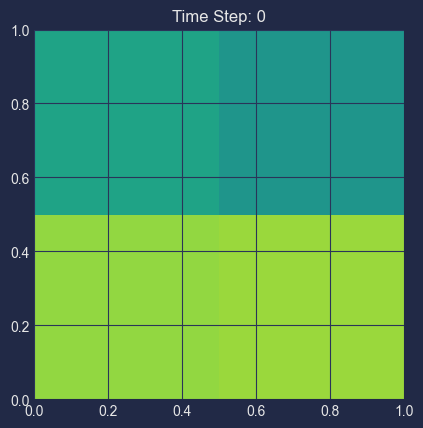

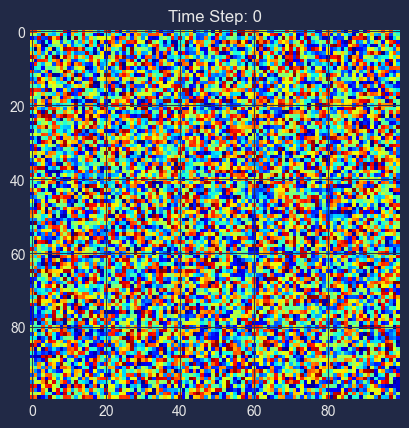

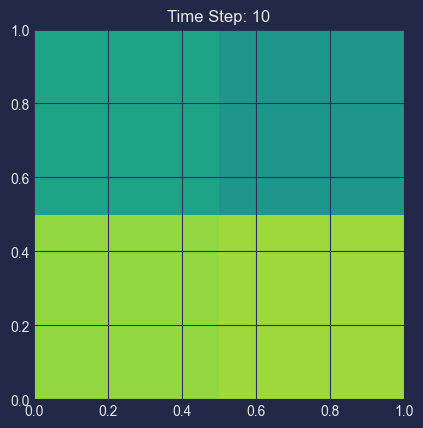

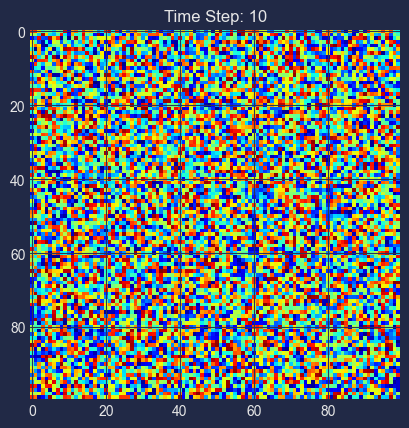

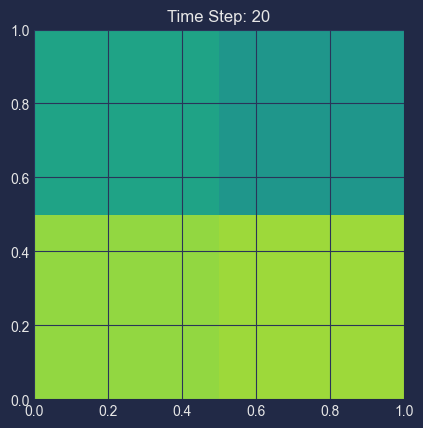

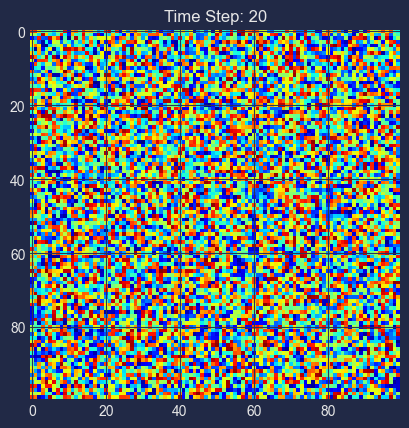

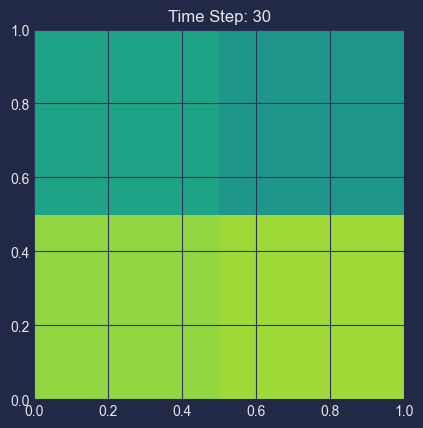

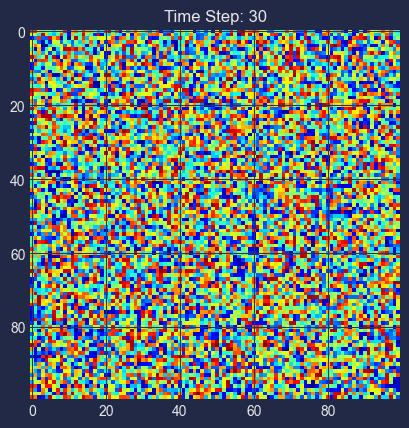

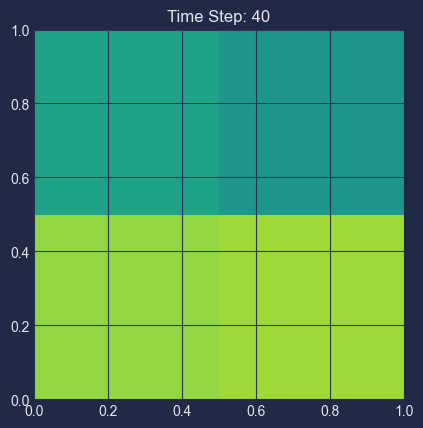

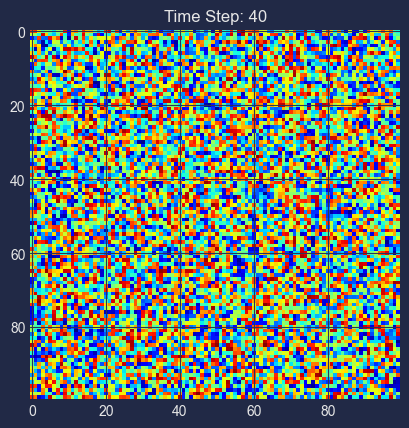

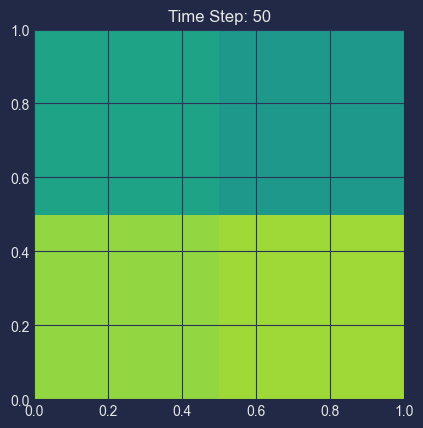

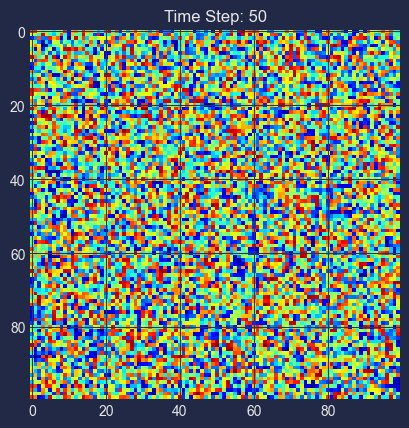

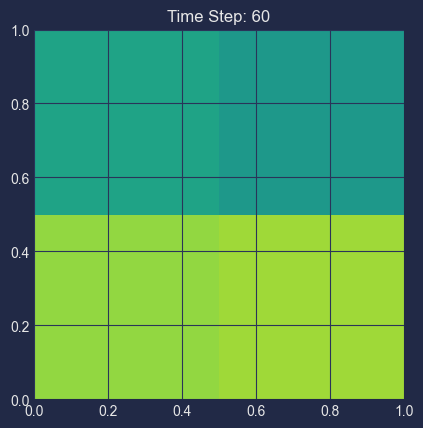

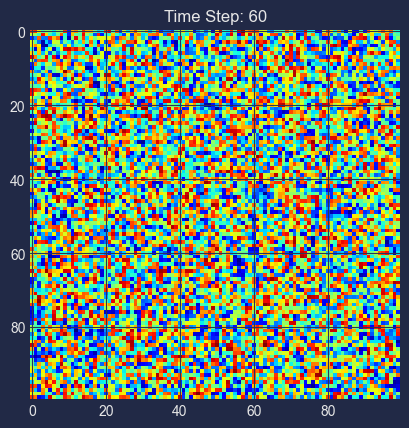

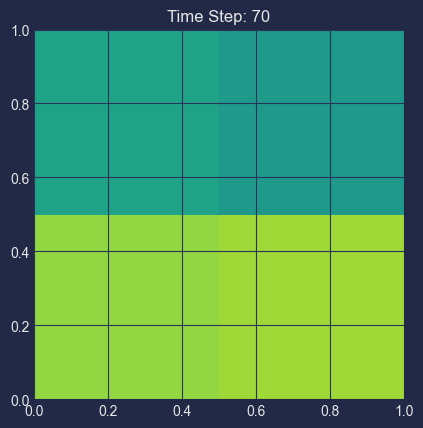

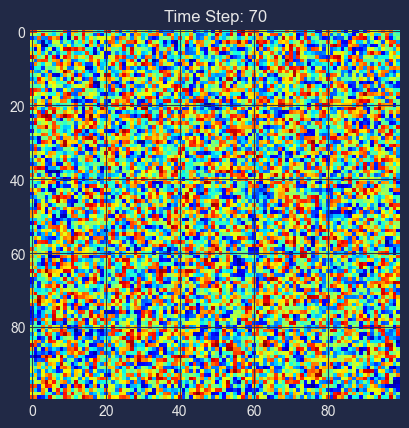

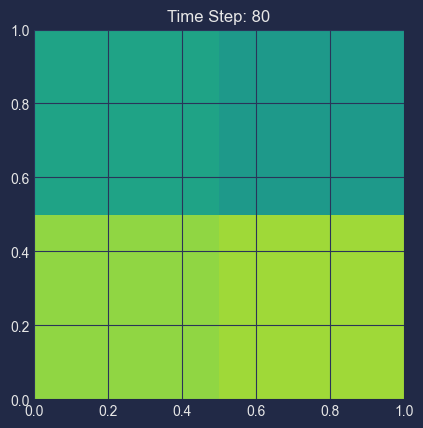

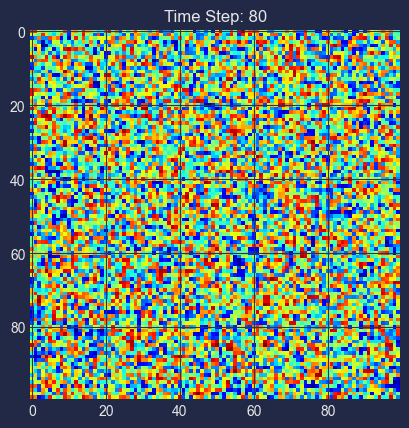

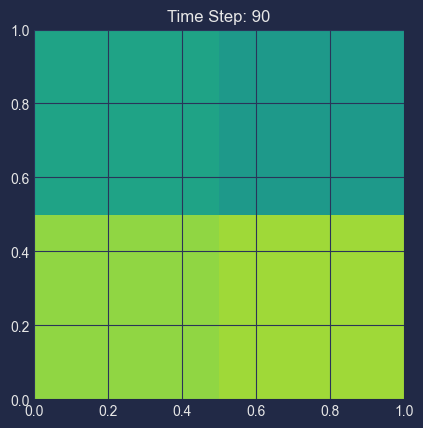

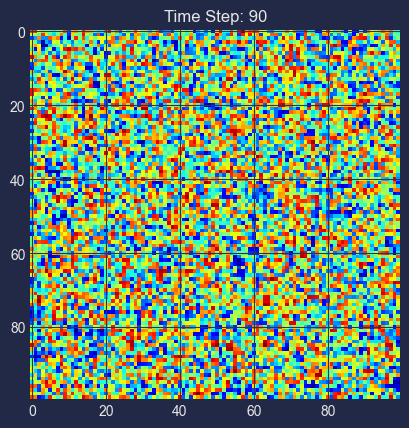

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplcyberpunk

plt.style.use("cyberpunk")

# Параметри моделі
Du = 0.1
Dv = 0.1
r = 0.1
K = 1.0
alpha = 0.02
s = 0.1
beta = 0.1

# Розміри просторової сітки
Nx = 100
Ny = 100

# Крок по часу та простору
dt = 0.01
dx = 1.0
dy = 1.0

# Ініціалізація рішення
u = np.random.rand(Nx, Ny)
v = np.random.rand(Nx, Ny)

# Цикл по часу
for t in range(100):
    # Обчислення нових значень за рівняннями реакції-дифузії
    u_xx = (np.roll(u, 1, axis=0) - 2*u + np.roll(u, -1, axis=0)) / dx**2
    u_yy = (np.roll(u, 1, axis=1) - 2*u + np.roll(u, -1, axis=1)) / dy**2
    v_xx = (np.roll(v, 1, axis=0) - 2*v + np.roll(v, -1, axis=0)) / dx**2
    v_yy = (np.roll(v, 1, axis=1) - 2*v + np.roll(v, -1, axis=1)) / dy**2

    du_dt = Du * (u_xx + u_yy) + r*u*(1 - u/K) - alpha*u*v
    dv_dt = Dv * (v_xx + v_yy) + s*u*v - beta*v

    u += dt * du_dt
    v += dt * dv_dt

    # Вивід результатів кожні 10 кроків
    if t % 10 == 0:
        plt.figure()
        mplcyberpunk.add_glow_effects()
        plt.imshow(u, cmap='viridis')
        plt.title(f'Time Step: {t}')
        plt.show()
        
    # Вивід результатів кожні 10 кроків
    if t % 10 == 0:
        plt.figure()
        plt.imshow(u, cmap='jet')
        plt.title(f'Time Step: {t}')
        plt.show()


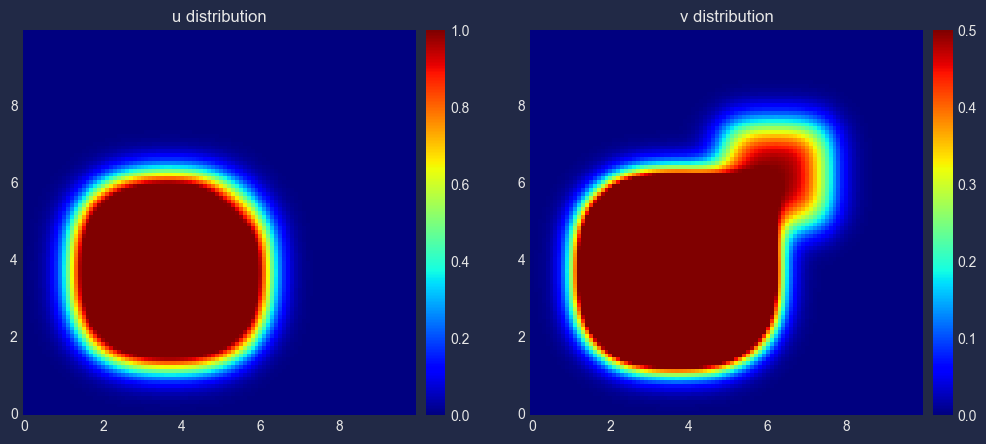

In [46]:
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Параметри моделі
Du = 0.1  # Коефіцієнт дифузії для u
Dv = 0.05  # Коефіцієнт дифузії для v
dt = 0.01  # Крок часу
dx = 0.1  # Крок простору
dy = 0.1  # Крок простору
T = 1.0  # Загальний час моделювання
Lx = Ly = 10.0  # Розміри просторової області

# Граничні умови
def set_initial_conditions(Nx, Ny):
    u = np.zeros((Nx, Ny))
    v = np.zeros((Nx, Ny))
    
    # Встановлення початкових умов (наприклад, гаусівський пятно)
    u[Nx//4:Nx//2, Ny//4:Ny//2] = 1.0
    v[Nx//2:Nx*3//4, Ny//2:Ny*3//4] = 0.5
    
    return u, v

# Один крок числового розв'язку
def step(u, v, Du, Dv, dt, dx, dy):
    new_u = u + dt * (Du * (np.roll(u, 1, axis=0) - 2*u + np.roll(u, -1, axis=0))/dx**2 +
                     Du * (np.roll(u, 1, axis=1) - 2*u + np.roll(u, -1, axis=1))/dy**2 - R(u, v))
                     
    new_v = v + dt * (Dv * (np.roll(v, 1, axis=0) - 2*v + np.roll(v, -1, axis=0))/dx**2 +
                     Dv * (np.roll(v, 1, axis=1) - 2*v + np.roll(v, -1, axis=1))/dy**2 + S(u, v))
                     
    return new_u, new_v

# Реакційні члени
def R(u, v):
    return u * v**2 - 2 * u

def S(u, v):
    return -u * v**2 + 2 * u

# Головна функція для числового розв'язку
def solve_system(Nx, Ny, Du, Dv, dt, dx, dy, T):
    u, v = set_initial_conditions(Nx, Ny)
    
    for t in np.arange(0, T, dt):
        u, v = step(u, v, Du, Dv, dt, dx, dy)
    
    return u, v

# Функція для оновлення графіку в анімації
def update_plot(frame, im1, im2, cbar1, cbar2):
    u, v = step(im1.get_array().reshape((Nx, Ny)), im2.get_array().reshape((Nx, Ny)), Du, Dv, dt, dx, dy)
    
    im1.set_array(u.ravel())
    im2.set_array(v.ravel())
    
    cbar1.update_normal(im1)
    cbar2.update_normal(im2)

# Графіки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
X, Y = np.meshgrid(np.arange(0, Lx, dx), np.arange(0, Ly, dy))

# Початкові дані для графіків
u_initial, v_initial = set_initial_conditions(Nx, Ny)
im1 = ax1.pcolormesh(X, Y, u_initial, cmap='jet')
ax1.set_title('u distribution')

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cbar1 = plt.colorbar(im1, cax=cax1)

im2 = ax2.pcolormesh(X, Y, v_initial, cmap='jet')
ax2.set_title('v distribution')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
cbar2 = plt.colorbar(im2, cax=cax2)

# Анімація
animation = FuncAnimation(fig, update_plot, fargs=(im1, im2, cbar1, cbar2), frames=range(1, 200), interval=50, blit=False)

# Збереження анімації
animation_folder = r'C:\Users\prime\PycharmProjects\KPI_tasks\TASK_7'
animation_file = 'reaction_diffusion_animation.gif'

animation.save(animation_folder + '\\' + animation_file, writer='pillow')

plt.show()
